In [1]:
import seizure_detection_simple

data = seizure_detection_simple.doload('Dog_1', False, False)

Reading from clips/Dog_1/ 596 596


/Users/vikramnagashoka/miniconda3/envs/lane_lines/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
data

<class 'pandas.core.panel.Panel'>
Dimensions: 596 (items) x 400 (major_axis) x 17 (minor_axis)
Items axis: ictal_1 to interictal_99
Major_axis axis: 0 to 399
Minor_axis axis: 0 to time

In [3]:
data.keys()

Index(['ictal_1', 'ictal_10', 'ictal_100', 'ictal_101', 'ictal_102',
       'ictal_103', 'ictal_104', 'ictal_105', 'ictal_106', 'ictal_107',
       ...
       'interictal_90', 'interictal_91', 'interictal_92', 'interictal_93',
       'interictal_94', 'interictal_95', 'interictal_96', 'interictal_97',
       'interictal_98', 'interictal_99'],
      dtype='object', length=596)

In [4]:
data['ictal_1'].keys()

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 'time'], dtype='object')

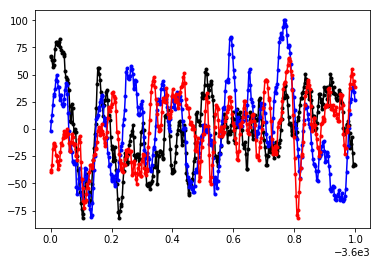

In [5]:
seizure_detection_simple.plot(data)

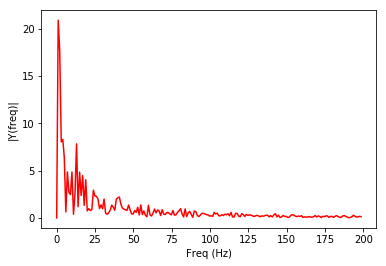

In [6]:
seizure_detection_simple.plotSpectrum(data['ictal_1'][0], 399)

In [7]:
import numpy as np

def fft(time_data):
    return np.log10(np.absolute(np.fft.rfft(time_data, axis=1)[:,1:48]))


## Step 1.3

In [8]:
# For each segment in data.keys(), take data[segment], transpose it, and call fft() on it.
# Take the result (all channels by all 47 frequencies) and convert it into a 1D array.
# This is a feature row in 2D array X.
# Set the class label for the same row in 1D array y, dependong on if the segment name 
# includes 'interictal' (this is a non-match) vs 'ictal' (this is a match)

X = []
y = []
i = 0
for segment in data.keys():
    transpose_data = data[segment].transpose()
    fft_res = np.array(transpose_data)
    fft_reshape = X.append(fft_res.reshape(-1)) 
    if "interictal" in segment:
        y.append(0)
    elif "ictal" in segment:
        y.append(1) 

    
    

In [9]:
# Create X_train, X_test, y_train, y_test with
# random_state = 42 and test_size = 0.3
import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.3, random_state=42)


## Step 1.4 Best Result

In [10]:
## Produce your best output here!
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier(max_depth=3)
dt_model.fit(X_train, y_train)
y_pred_test = dt_model.predict(X_test)
test_score = dt_model.score(X_test, y_test)

print("Accuracy " + str(test_score))

Accuracy 1.0
